<div class="alert alert-block alert-info">
<ul><strong>
<li>Justin Chin | Miguel Dominguez</li>
<li>CSC 59929</li>
<li>Machine Learning</li>
<li>Dr. Erik K. Grimmelmann</li>
<li>Date: </li>
<li>Project</li>
</strong>
</ul>
</div>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

In [2]:
#Get Bird Bone Dataframe
birds = pd.read_csv('bird.csv', sep=',')
new_columns = ['ID', 'Humerus L', 'Humerus D', 'Ulna L','Ulna D', 'Femur L', 'Femur D',
              'Tibiotarsus L', 'Tibiotarsus D', 'Tarsometatarsus L','Tarsometatarsus D', 'Type'] 
birds.columns = new_columns

#Drop rows with NaN values
birds = birds.dropna()
birds.head()

# CHIN Data
df = birds
df.columns = new_columns
df = df.drop(new_columns[0:1],1) # remove the ID column
df.head()

,Humerus L,Humerus D,Ulna L,Ulna D,Femur L,Femur D,Tibiotarsus L,Tibiotarsus D,Tarsometatarsus L,Tarsometatarsus D,Type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [30]:
#Get data X and class Y
X = birds.iloc[:,1:11].values
y = birds['Type'].values

#Transform Type values for birds into numerical classes ranging from 0 to 5
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)
#y # 3,5,4,1,0,2 === > SW, W, T, R, P, SO

In [6]:
#Build a dictionary with the feature names.
label = [ 'Humerus L', 'Humerus D', 'Ulna L','Ulna D', 'Femur L', 'Femur D',
              'Tibiotarsus L', 'Tibiotarsus D', 'Tarsometatarsus L','Tarsometatarsus D']
feature_dict = {i:label for i,label in zip(range(0,11), new_columns)}

#Labels for Classes
label_dict = {3: 'SW', 5: 'W', 4: 'T', 1: 'R', 0: 'P', 2: 'SO'}

# Functions (write documentation for functions, graphing fuct, others)

In [22]:
def plot_decision_regions(X, y, classifier,
    test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('^', 's', 'o','^', 's', 'o')
    #colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colors = colors2
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    #if test_idx:
       # X_test, y_test = X[test_idx, :], y[test_idx]
        #plt.scatter(X_test[:, 0], X_test[:, 1], c='',
        #alpha=1.0, linewidth=1, marker='o',
       # s=55, label='test set')

In [23]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #out = ax.contourf(xx, yy, Z, **params)
    out = ax.contourf(xx, yy, Z, color = col, alpha=0.8)
    return out

def barchart(model_accuracy, model_title,optext):
    """Plot bars for accuracy for each model.
    
    Parameters
    ----------
    model_accuracy: list of float accuracy values
    model_title: list of names for each model
    optext: optional string that is part of plot graph
    """
    width = 0.75
    ind = np.arange(10)
    fig, ax = plt.subplots(figsize=(20,15))
    colors = ['#DEB887','#A1EAFB','#CFEE91','#FFFF99','#49BEB7','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
    bars = ax.bar([0,1,2,3,4,5,6,7,8,9], model_accuracy , width, color=colors)

    #Add some text for labels, title and axes ticks
    ax.set_xlabel("Models",fontsize=20)
    ax.set_ylabel('Accuracy',fontsize=20)
    ax.set_title('SVM Kernels Models and their Accuracy' + optext,fontsize=35)
    ax.set_xticks(ind) #Positioning on the x axis
    ax.set_xticklabels(range(0,10),
                      fontsize = 20)
    ax.legend(bars,model_title, loc= 'upper center',fontsize=25)

    def autolabel(rects,fontsize=20):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height,height,
                    ha='center', va='bottom',fontsize=fontsize)
    autolabel(bars)
    plt.ylim([0,2])
    plt.show()

# Statistics

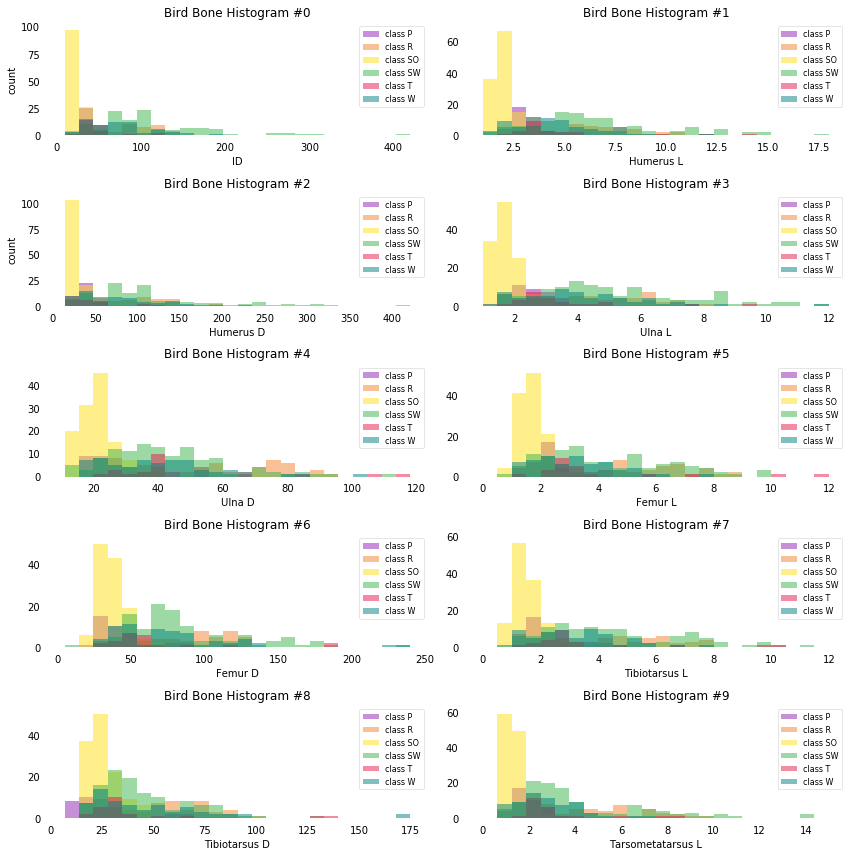

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,12))

for ax,cnt in zip(axes.ravel(), range(0,11)):  
    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)
    
    colors1 = ('red','blue','green','#658525', '#4EEAF6', '#FFCEF3')
    colors2 = ('#911eb4','#f58231','#ffe119','#3cb44b','#e6194b','#008080')
    # plottling the histograms
    for lab,col in zip(range(0,6), colors2 ):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Bird Bone Histogram #%s' %str(cnt))
    
    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')
fig.tight_layout()       
plt.show()

# Pre-processing techniques:

# Linear Discriminant Analysis (LDA)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
Xlda = sklearn_lda.fit_transform(X, y)

In [26]:
def plot_scikit_lda(X, title):
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
    
    for label,marker,color in zip(
        range(0,6),('^', 's', 'o','^', 's', 'o'), colors2):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label], # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title,fontsize=20)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    #plt.tight_layout
    plt.show()

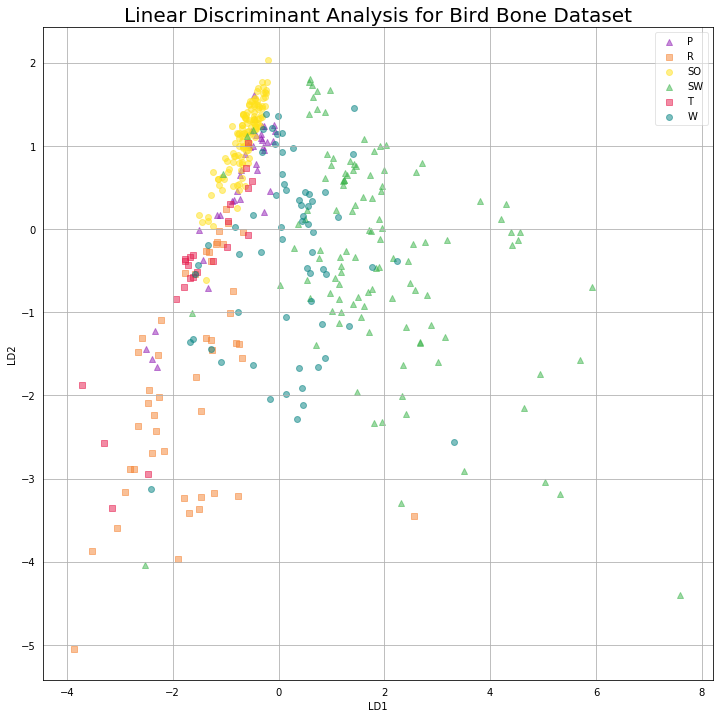

In [27]:
plot_scikit_lda(Xlda, title='Linear Discriminant Analysis for Bird Bone Dataset')

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

Logimodel = LogisticRegression()
Logimodel.fit(X[:,(0,1)],y)
Logimodel.score(X[:,(0,1)],y)



0.5447941888619855

In [30]:
from sklearn.linear_model import LogisticRegression

Logimodel = LogisticRegression(C=1)
Logimodel.fit(X,y)
Logimodel.score(X,y)

0.89104116222760288

# SVM (no kernel)

In [13]:
from sklearn import svm
col = ['red','blue','green','#658525', '#4EEAF6', '#FFCEF3']

In [14]:
#Create model 
SVMmodel = svm.SVC(kernel='linear')
#SVMmodel = svm.SVC(kernel='poly', degree=2)
#Train the model
SVMmodel.fit(X[:,(0,1)], y)
#Print Accuracy
SVMmodel.score(X[:,(0,1)],y)

0.61743341404358354

In [15]:
#Create model 
SVMmodel = svm.SVC(kernel='linear')
#Train the model
SVMmodel.fit(X[:,0:1], y)
#Print Accuracy
SVMmodel.score(X[:,0:1],y)

0.55932203389830504

In [ ]:
Adaboosting
RandomForests
Regression
NN
Naive Bayes
Perceptron

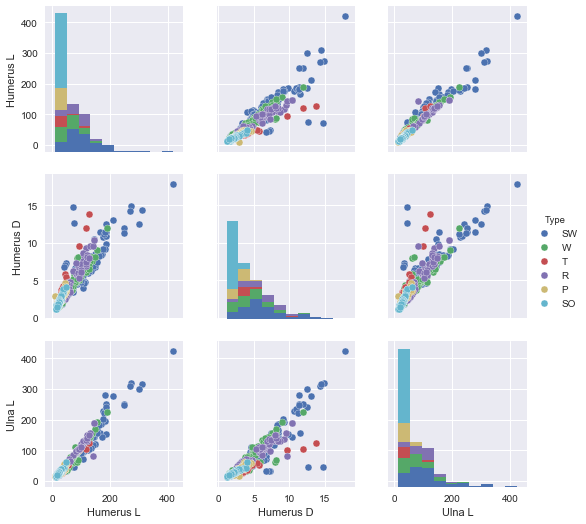

In [25]:
'''Data Vizualization'''
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

dfplot = df.drop(new_columns[4:11],1) # Show first 4 pairs
plt.close() #clear old plots
sns.pairplot(dfplot,hue="Type",size=2.5) # plot these
plt.show() #show new plot


In [235]:
'''Time'''
import time

'''Split Data'''
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(X,y,test_size=.3)

'''Astropy Table'''
from astropy.table import Table,Column
t = Table(names=('id','criterion','size','time','score'))
t2 = Table(names=('id','size','time','score'))

'''Random Forests'''
from sklearn.ensemble import RandomForestClassifier

#REDO THIS WITH 
#n_estimators 10, 50, 100 200
#criterion gini, entropy
#max depth : 10, 15, 20
#class weight none, balanced
#n_estimators
forestSize = [100,200,300,400,500,600,700,800,900,1000]
c = ['gini','entropy']
#hold scores
scoresRF = np.zeros(len(forestSize))
scoresRFoob = np.zeros(len(forestSize))



for i in range(0,len(forestSize)):
    for j in range(0, len(c)):
        '''RandomForest'''
        rfc = RandomForestClassifier(criterion=c[j],
                                     n_estimators=forestSize[i],
                                    bootstrap=True)
        #Fit
        startTime = time.time() #start time
        rfc.fit(trainx,trainy)
        endTime = time.time() #end time
        elaspedTime = round(endTime-startTime,4)

        #add to scores
        scoresRF[i] = round(rfc.score(testx,testy),4)

        #Add to row
        t.add_row([2*i+1+j,1,forestSize[i],elaspedTime,round(rfc.score(testx,testy),4)])
    """ '''RandomForest w OOB'''
        rfc = RandomForestClassifier(criterion=c[j],
                                    n_estimators=forestSize[i],
                                    oob_score=True)
        #Fit
        startTime = time.time() #start time
        rfc.fit(X,y)
        endTime=time.time()
        elaspedTime=round(endTime-startTime,4)

        #add to scores
        scoresRFoob[i] = round(rfc.oob_score_,4)

        #Add to row
        t2.add_row([i+1,forestSize[i],elaspedTime,round(rfc.oob_score_,4)])
    """
t['criterion']=[c[0],c[1],c[0],c[1],c[0],c[1],c[0],c[1],c[0],c[1],c[0],c[1],c[0],c[1],c[0],c[1],c[0],c[1],c[0],c[1]]

        
# oob do not need independent validation set

#print Table
print("RandomForest")
t.pprint(max_width=-1)
print(max(scoresRF))
'''
print("RandomForest w/ OOB")
t2.pprint(max_width=-1)
print(max(scoresRFoob))
'''

RandomForest
 id  criterion  size   time  score 
---- --------- ------ ------ ------
 1.0      gini  100.0 0.1339 0.8306
 2.0   entropy  100.0 0.1642 0.8065
 3.0      gini  200.0 0.2579 0.8226
 4.0   entropy  200.0 0.3334 0.8226
 5.0      gini  300.0 0.4048 0.8306
 6.0   entropy  300.0 0.4947 0.8306
 7.0      gini  400.0 0.5245 0.8306
 8.0   entropy  400.0 0.6402 0.8387
 9.0      gini  500.0  0.652 0.8468
10.0   entropy  500.0 0.8013 0.8468
11.0      gini  600.0 0.8106 0.8306
12.0   entropy  600.0 0.9884 0.8387
13.0      gini  700.0 0.9297 0.8468
14.0   entropy  700.0 1.1359 0.8306
15.0      gini  800.0 1.0384 0.8468
16.0   entropy  800.0 1.2698 0.8306
17.0      gini  900.0 1.2033 0.8387
18.0   entropy  900.0 1.4485 0.8387
19.0      gini 1000.0 1.2812 0.8387
20.0   entropy 1000.0 1.5678 0.8387
0.8468


'\nprint("RandomForest w/ OOB")\nt2.pprint(max_width=-1)\nprint(max(scoresRFoob))\n'

In [225]:
'''Naive Bayes'''
from sklearn.naive_bayes import GaussianNB

#table
tNB = Table(names=('id','time','score'))


for i in range(0,2):
    #Model
    gnb = GaussianNB()

    #Fit
    startTime = time.time() #start time
    gnb.fit(trainx,trainy)
    endTime = time.time() #end time
    elaspedTime = round(endTime-startTime,4)

    #Add to row
    tNB.add_row([i+1,elaspedTime,round(gnb.score(testx,testy),4)])
    
print("NaiveBayes")
tNB.pprint(max_width=-1)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
scaler.fit(trainx)
trainxs = scaler.transform(trainx)
testxs = scaler.transform(testx)
print(confusion_matrix(testy,gnb.predict(testx)))
print(classification_report(testy,gnb.predict(testx)))

NaiveBayes
 id  time  score 
--- ------ ------
1.0 0.0011 0.4516
2.0 0.0007 0.4516
[[ 3  0  4  0  0  1]
 [ 5  9  0  0  0  2]
 [ 7  0 28  0  0  1]
 [ 5  3  2  8  0 19]
 [ 5  0  1  0  0  0]
 [ 4  2  6  1  0  8]]
             precision    recall  f1-score   support

          0       0.10      0.38      0.16         8
          1       0.64      0.56      0.60        16
          2       0.68      0.78      0.73        36
          3       0.89      0.22      0.35        37
          4       0.00      0.00      0.00         6
          5       0.26      0.38      0.31        21

avg / total       0.60      0.45      0.45       124



/Users/Chin/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
'''GradientBoostingClassifier'''
from sklearn.ensemble import GradientBoostingClassifier

#table
tGBC = Table(names=('id','eta','max_depth','n_estimators','time','score'))

lrate = [.001,.01,1]
depth = [3,9]
num = [100,1000]

for i in range(0,len(lrate)):
    for j in range(0,len(depth)):
        for k in range(0,len(num)):
            #Model
            gbc= GradientBoostingClassifier(loss='deviance', 
                                            n_estimators=num[k],
                                            max_depth=depth[j], 
                                            learning_rate=lrate[i])
             #Fit
            startTime = time.time() #start time
            gbc.fit(trainx,trainy)
            endTime = time.time() #end time
            elaspedTime = round(endTime-startTime,4)

            #Add to row
            tGBC.add_row([i+1+(j/10)+(k/100),lrate[i],depth[j],num[k],elaspedTime,round(gbc.score(testx,testy),4)])

print("GBC")
tGBC.pprint(max_width=-1)
    

GBC
 id   eta  max_depth n_estimators   time  score 
---- ----- --------- ------------ ------- ------
 1.0 0.001       3.0        100.0  0.3889 0.6532
1.01 0.001       3.0       1000.0  3.9851 0.6774
 1.1 0.001       9.0        100.0  0.9432 0.6452
1.11 0.001       9.0       1000.0 12.6275 0.7016
 2.0  0.01       3.0        100.0  0.3838 0.6774
2.01  0.01       3.0       1000.0  4.0169 0.7016
 2.1  0.01       9.0        100.0  1.2843 0.7258
2.11  0.01       9.0       1000.0  5.0727 0.6774
 3.0   1.0       3.0        100.0  0.1997 0.6935
3.01   1.0       3.0       1000.0  1.7355 0.6855
 3.1   1.0       9.0        100.0  0.2142 0.6855
3.11   1.0       9.0       1000.0  1.7437 0.6774


In [207]:
'''AdaBoost'''
from sklearn.ensemble import AdaBoostClassifier
#table
tABC = Table(names=('id','eta','n_estimators','time','score'))

lrate = [.0001,.001,.01,]
num = [50,100,1000]

for i in range(0,len(lrate)):
    for k in range(0,len(num)):
        #Model
        abc= AdaBoostClassifier(n_estimators=num[k],
                                learning_rate=lrate[i])
        #Fit
        startTime = time.time() #start time
        abc.fit(trainx,trainy)
        endTime = time.time() #end time
        elaspedTime = round(endTime-startTime,4)

        #Add to row
        tABC.add_row([i+1+(j/10)+(k/100),lrate[i],num[k],elaspedTime,round(abc.score(testx,testy),4)])

print("AdaBoost")
tABC.pprint(max_width=-1)

AdaBoost
 id   eta   n_estimators  time  score 
---- ------ ------------ ------ ------
 1.0 0.0001         50.0  0.068 0.5323
1.01 0.0001        100.0 0.1405 0.5323
1.02 0.0001       1000.0 1.3429 0.5323
 2.0  0.001         50.0 0.0668 0.5323
2.01  0.001        100.0 0.1384 0.5323
2.02  0.001       1000.0 1.3841 0.5484
 3.0   0.01         50.0 0.0674 0.5484
3.01   0.01        100.0 0.1393 0.5484
3.02   0.01       1000.0 1.3264 0.2581


In [209]:
'''LogisticRegression'''
from sklearn.linear_model import LogisticRegression

#table
tLR = Table(names=('id','Penalty','C','time','score'))

p = ['l1','l2']
reg = [.001,.1,1,10]

for i in range(0,len(p)):
    for k in range(0,len(reg)):
        #Model
        lr= LogisticRegression(penalty=p[i],C=reg[k])
        #Fit
        startTime = time.time() #start time
        lr.fit(trainx,trainy)
        endTime = time.time() #end time
        elaspedTime = round(endTime-startTime,4)

        #Add to row
        tLR.add_row([i+1+(k/10),i+1,reg[k],elaspedTime,round(lr.score(testx,testy),4)])

print("LR")
tLR.pprint(max_width=-1)

LR
 id Penalty   C    time  score 
--- ------- ----- ------ ------
1.0     1.0 0.001 0.0026 0.2984
1.1     1.0   0.1 0.0303 0.8387
1.2     1.0   1.0 0.0674 0.8387
1.3     1.0  10.0 0.1179 0.8226
2.0     2.0 0.001 0.0023 0.6694
2.1     2.0   0.1 0.0043 0.8468
2.2     2.0   1.0 0.0057  0.871
2.3     2.0  10.0 0.0079 0.8306


In [206]:
'''Perceptron'''
from sklearn.linear_model import Perceptron

#table
tlmP = Table(names=('id','Penalty','Alpha','time','score'))

p = ['l1','l2']
reg = [.001,.1,1,10]

for i in range(0,len(p)):
    for k in range(0,len(reg)):
        #Model
        lmP= Perceptron(penalty=p[i],alpha=reg[k])
        #Fit
        startTime = time.time() #start time
        lmP.fit(trainx,trainy)
        endTime = time.time() #end time
        elaspedTime = round(endTime-startTime,4)

        #Add to row
        tlmP.add_row([i+1+(k/10),i+1,reg[k],elaspedTime,round(lmP.score(testx,testy),4)])

print("Perceptron")
tlmP.pprint(max_width=-1)

Perceptron
 id Penalty Alpha  time  score 
--- ------- ----- ------ ------
1.0     1.0 0.001 0.0027  0.379
1.1     1.0   0.1 0.0016 0.4516
1.2     1.0   1.0 0.0016 0.3145
1.3     1.0  10.0 0.0018 0.2903
2.0     2.0 0.001 0.0014 0.3548
2.1     2.0   0.1 0.0014 0.2984
2.2     2.0   1.0 0.0016 0.2984
2.3     2.0  10.0 0.0015 0.2984


In [205]:
'''RidgeClassifier'''
from sklearn.linear_model import RidgeClassifier

#table
tRC = Table(names=('id','alpha','normalize','class_weight','time','score'))

reg = [.001,.1,1,10]
cw = [None,'balanced']

for i in range(0,len(reg)):
    for k in range(0,len(cw)):
        #Model
        rc = RidgeClassifier(alpha=reg[i],
                            normalize = True,
                            class_weight = cw[k])
        #Fit
        startTime = time.time() #start time
        rc.fit(trainx,trainy)
        endTime = time.time() #end time
        elaspedTime = round(endTime-startTime,4)

        #Add to row
        #tRC.add_row([i+1+(k/10),reg[i],1,1,elaspedTime,round(rc.score(testx,testy),4)])
        tRC.add_row([2*i+k,1,1,1,1,1])
        tRC[2*i+k]=[2*i+k,reg[i],1,1,elaspedTime,round(rc.score(testx,testy),4)]
        tRC['normalize'] = ['True']
        
tRC['class_weight'] = [cw[0],cw[1],cw[0],cw[1],cw[0],cw[1],cw[0],cw[1]]
print("RC")
tRC.pprint(max_width=-1)

RC
 id alpha normalize class_weight  time  score 
--- ----- --------- ------------ ------ ------
0.0 0.001      True         None 0.0017 0.6694
1.0 0.001      True     balanced 0.0024 0.7339
2.0   0.1      True         None  0.001 0.5645
3.0   0.1      True     balanced 0.0019 0.6774
4.0   1.0      True         None  0.001 0.4758
5.0   1.0      True     balanced 0.0022 0.5403
6.0  10.0      True         None 0.0011 0.4435
7.0  10.0      True     balanced 0.0017 0.4758


In [208]:
'''SGD Classifier'''
from sklearn.linear_model import SGDClassifier

#table
tlmP = Table(names=('id','Penalty','Alpha','time','score'))

l = ['hinge','log','modified_huber','squared_hinge','perceptron']
p = ['l2','l1','elasticnet']
reg = [.0001,.1,1,10]

for i in range(0,len(p)):
    for k in range(0,len(reg)):
        #Model
        sgd= SGDClassifier(penalty=p[i],alpha=reg[k])
        #Fit
        startTime = time.time() #start time
        sgd.fit(trainx,trainy)
        endTime = time.time() #end time
        elaspedTime = round(endTime-startTime,4)

        #Add to row
        tlmP.add_row([i+1+(k/10),i+1,reg[k],elaspedTime,round(sgd.score(testx,testy),4)])

print("SGD")
tlmP.pprint(max_width=-1)

SGD
 id Penalty Alpha   time  score 
--- ------- ------ ------ ------
1.0     1.0 0.0001 0.0032 0.4113
1.1     1.0    0.1 0.0014 0.2984
1.2     1.0    1.0 0.0014 0.1774
1.3     1.0   10.0 0.0014 0.6371
2.0     2.0 0.0001 0.0017 0.6452
2.1     2.0    0.1 0.0016 0.4677
2.2     2.0    1.0 0.0016 0.2903
2.3     2.0   10.0 0.0017  0.129
3.0     3.0 0.0001 0.0019  0.629
3.1     3.0    0.1 0.0018 0.6371
3.2     3.0    1.0 0.0017 0.4194
3.3     3.0   10.0 0.0018 0.5645


In [248]:
'''MLP Classifier'''
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion matrix

#table
tmlp = Table(names=('id','activation','solver','alpha','eta','time','score'))

h = [30,30,30]
a = ['logistic','tanh','relu']
s = ['lbfgs','adam']
al = [.0001,.001,.01,.1,1]
le = ['constant','invscaling']

for i in range(0,len(a)):
    for j in range(0,len(s)):
        for k in range(0,len(al)):
            for l in range(0,len(le)):
            
                #Model
                mlp= MLPClassifier(activation = a[i],
                                   solver = s[j],
                                   alpha = al[k],
                                   learning_rate = le[l])
                #Fit
                startTime = time.time() #start time
                mlp.fit(trainx,trainy)
                endTime = time.time() #end time
                elaspedTime = round(endTime-startTime,4)

                #Add to row
                tmlp.add_row([2*i+j+1+k/10+l/100,1,2,al[k],4,elaspedTime,round(mlp.score(testx,testy),4)])

print("MLP")
tmlp.pprint(max_width=-1,max_lines=-1)

/Users/Chin/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLP
 id  activation solver alpha  eta  time  score 
---- ---------- ------ ------ --- ------ ------
 1.0        1.0    2.0 0.0001 4.0  0.228  0.871
1.01        1.0    2.0 0.0001 4.0 0.1906 0.8226
 1.1        1.0    2.0  0.001 4.0 0.1906 0.8145
1.11        1.0    2.0  0.001 4.0 0.1915 0.8145
 1.2        1.0    2.0   0.01 4.0 0.2014 0.8468
1.21        1.0    2.0   0.01 4.0 0.1871 0.7984
 1.3        1.0    2.0    0.1 4.0   0.19 0.9113
1.31        1.0    2.0    0.1 4.0 0.1917 0.8629
 1.4        1.0    2.0    1.0 4.0 0.1945 0.9032
1.41        1.0    2.0    1.0 4.0 0.2257  0.879
 2.0        1.0    2.0 0.0001 4.0 0.2572 0.8387
2.01        1.0    2.0 0.0001 4.0 0.2611 0.8226
 2.1        1.0    2.0  0.001 4.0 0.2581 0.8306
2.11        1.0    2.0  0.001 4.0 0.2593 0.8145
 2.2        1.0    2.0   0.01 4.0  0.255 0.7984
2.21        1.0    2.0   0.01 4.0 0.2493 0.8226
 2.3        1.0    2.0    0.1 4.0 0.2419 0.8145
2.31        1.0    2.0    0.1 4.0  0.242 0.7903
 2.4        1.0    2.0    1.0 4.0   

In [270]:
def draw_confusion_matrix(cm):
    """
    define a function to draw confusion matrix.
    """
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    sns.heatmap(
        cm, 
        square=True, 
        xticklabels=["P", "R", "SO", "SW", "T", "W"], 
        annot=True, 
        annot_kws={"fontsize": 12}, 
        yticklabels=["P", "R", "SO", "SW", "T", "W"], 
        cbar=False, 
        cmap=sns.light_palette("#00304e", as_cmap=True),
        ax=ax
    )

    ax.set_xlabel("predicted ecological group", fontsize=12)
    ax.set_ylabel("real ecological group", fontsize=12)
    ax.set_title("Confusion Matrix", fontsize=12)

             precision    recall  f1-score   support

          0       0.75      0.25      0.38        12
          1       0.47      0.73      0.57        11
          2       0.86      1.00      0.93        44
          3       0.85      0.92      0.88        36
          4       0.83      0.71      0.77         7
          5       0.86      0.43      0.57        14

avg / total       0.81      0.80      0.78       124



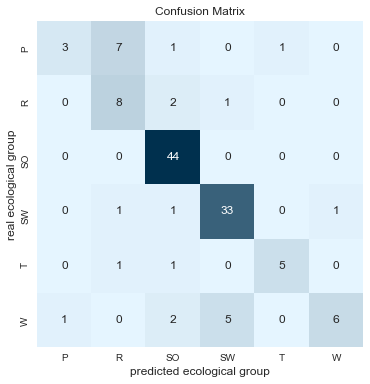

0.9355


In [284]:
'''MLP Classifier SUMMARY END'''
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

#table
a = ['tanh']
s = ['lbfgs']
al = [1]
le = ['constant']

for i in range(0,len(a)):
    for j in range(0,len(s)):
        for k in range(0,len(al)):
            for l in range(0,len(le)):
            
                #Model
                mlpSum= MLPClassifier(activation = a[i],
                                   solver = s[j],
                                   alpha = al[k],
                                   learning_rate = le[l])
                #Fit
                startTime = time.time() #start time
                mlpSum.fit(trainx,trainy)
                endTime = time.time() #end time
                elaspedTime = round(endTime-startTime,4)
                
                predictions = mlp.predict(testx)
                
                plt.close()
                draw_confusion_matrix(confusion_matrix(testy,predictions))
                print(classification_report(testy,predictions))
                
                plt.show()
                print(round(mlpSum.score(testx,testy),4))
                #Add to row
                #tmlp.add_row([2*i+j+1+k/10+l/100,1,2,al[k],4,elaspedTime,round(mlp.score(testx,testy),4)])
